# Collie

Collie is a town in the South West region of Western Australia, 213 kilometres south of the state capital, Perth, and 59 kilometres inland from the regional city and port of Bunbury. It is near the junction of the Collie and Harris Rivers, in the middle of dense jarrah forest and the only coalfields in Western Australia. At the 2016 census, Collie had a population of 7,192.

Collie is mainly known as a coal-producing centre, but also offers industrial, agricultural and aquaculture tourism industries. Muja Power station is located east of the town, and to its west is the Wellington Dam, a popular location for fishing, swimming and boating.

<img src="data/Collie_Satellite.png" alt="drawing" width="400" align="left"/>

Western Collieries Limited in 1950. (Source: Premier Coal)
<img src="data/western_colleries.jpeg" alt="drawing" width="400" align="left"/>


### Task:

You are the owner of Westenviro, a consulting company in Perth especialised in environmental impact studies and landscape rehabilitation plans. You have been contacted by the Collie local council regarding the inminent closure of the local coal mine. They want to carry out a study about the impact that this mine has had in the area over the last years and potentials ways of rehabilitating the area over the coming years.

Back in your office you want to have a look at the effect that this open mine has had in the area. You have used the DEA Fractional Cover product in the past and decide to have a look and compare the product generated by Landsat 5 in the 90's with the current state captured by Landsat 8.

Fractional Cover represents the proportion of the land surface that is bare (BS), covered by photosynthetic vegetation (PV), or non-photosynthetic vegetation (NPV). The green (PV) fraction includes leaves and grass, the non-photosynthetic fraction (NPV) includes branches, dry grass and dead leaf litter, and the bare soil (BS) fraction includes bare soil or rock. You expect to see an increase in the bare soil fraction over the past years.

In [184]:
%matplotlib inline

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import os
import sys

#modules for datacube
import datacube
from datacube.storage import masking
#from datacube.helpers import ga_pq_fuser, write_geotiff

# Import external functions from dea-notebooks
sys.path.append('./Scripts/')
import DEAPlotting, DEADataHandling

#ignore datacube warnings (needs to be last import statement)
import warnings
warnings.filterwarnings('ignore', module='datacube')

### Setting up

We create the DEA object and list the products that are currently available on the DEA containing the string `fc` which is the code that indicates Fractional Cover.

In [162]:
dc = datacube.Datacube(app='dc-FC')
products = dc.list_products()
display_columns = ['name', 'description']
display_rows = [1]
dc_products = products[display_columns]
dc_products[dc_products['name'].str.contains("fc")]

,name,description
id,,
10,fc_percentile_albers_annual,"Landsat Fractional Cover percentile 25 metre, ..."
11,fc_percentile_albers_seasonal,"Landsat Fractional Cover percentile 25 metre, ..."
4,ls5_fc_albers,"Landsat 5 Fractional Cover 25 metre, 100km til..."
41,ls7_fc_albers,"Landsat 7 Fractional Cover 25 metre, 100km til..."
5,ls8_fc_albers,"Landsat 8 Fractional Cover 25 metre, 100km til..."


### Collie in 2004

You define the query that will gather the Fractional Cover images for the region east of Collie, where the mine is located for the first months of 2004 specifying the Landsat 5 derived product `ls5_fc_albers`.

In [163]:
query = {
        'lat': (-33.3, -33.4),
        'lon': (116.2, 116.3),
        'time':('2004-01-01', '2004-03-31')
        }

collie_04 = dc.load(product='ls5_fc_albers', **query)

collie_04

<xarray.Dataset>
Dimensions:  (time: 5, x: 423, y: 490)
Coordinates:
  * time     (time) datetime64[ns] 2004-01-15T01:44:37.500000 ... 2004-03-19T01:44:58.500000
  * y        (y) float64 -3.722e+06 -3.722e+06 ... -3.734e+06 -3.734e+06
  * x        (x) float64 -1.458e+06 -1.458e+06 ... -1.448e+06 -1.447e+06
Data variables:
    BS       (time, y, x) int16 8 17 20 6 7 9 4 0 0 0 ... 5 7 0 0 0 0 0 12 26 39
    PV       (time, y, x) int16 11 11 12 10 8 10 7 8 9 5 ... 0 0 0 0 0 0 0 0 0 0
    NPV      (time, y, x) int16 79 71 67 82 83 80 88 91 ... 99 99 99 99 88 74 60
    UE       (time, y, x) int16 5 5 5 4 4 5 5 5 5 6 7 ... 4 4 3 3 3 3 3 3 4 5 6
Attributes:
    crs:      EPSG:3577

### Visualising the region

After performing the request you plot the bare soil component of the 5 images returned by DEA.

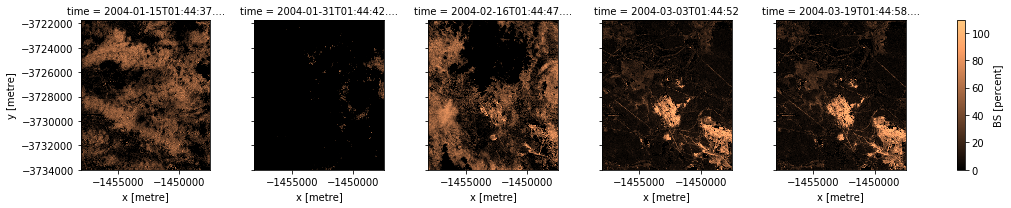

In [164]:
collie_04.BS.plot(col='time', col_wrap=5, cmap='copper')

### Deciding on a representative sample

After this visual inspection you realise the first 3 images are probably affected by clouds and decide to use the 4th as your representative sample of the state of the region in 2004.

In [165]:
collie_04 = collie_04.isel(time=slice(3,4))

### Collie in 2019

You repeat the operation using Landsat 8 images `ls8_fc_albers` over the same period of 2019 to minimise the seasonal changes. 

In [166]:
query = {
        'lat': (-33.3, -33.4),
        'lon': (116.2, 116.3),
        'time':('2019-01-01', '2019-03-31')
        }

collie_19 = dc.load(product='ls8_fc_albers', **query)

collie_19

<xarray.Dataset>
Dimensions:  (time: 6, x: 423, y: 490)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-08T02:05:43 ... 2019-03-29T02:05:25
  * y        (y) float64 -3.722e+06 -3.722e+06 ... -3.734e+06 -3.734e+06
  * x        (x) float64 -1.458e+06 -1.458e+06 ... -1.448e+06 -1.447e+06
Data variables:
    BS       (time, y, x) int16 30 32 31 30 28 27 28 28 ... 24 30 63 70 75 76 84
    PV       (time, y, x) int16 20 20 21 21 20 19 19 19 19 ... 0 0 0 0 0 0 0 0 0
    NPV      (time, y, x) int16 49 47 46 48 51 53 52 51 ... 76 70 36 30 24 24 15
    UE       (time, y, x) int16 11 11 11 11 11 10 10 10 10 ... 5 5 4 5 6 7 9 9 9
Attributes:
    crs:      EPSG:3577

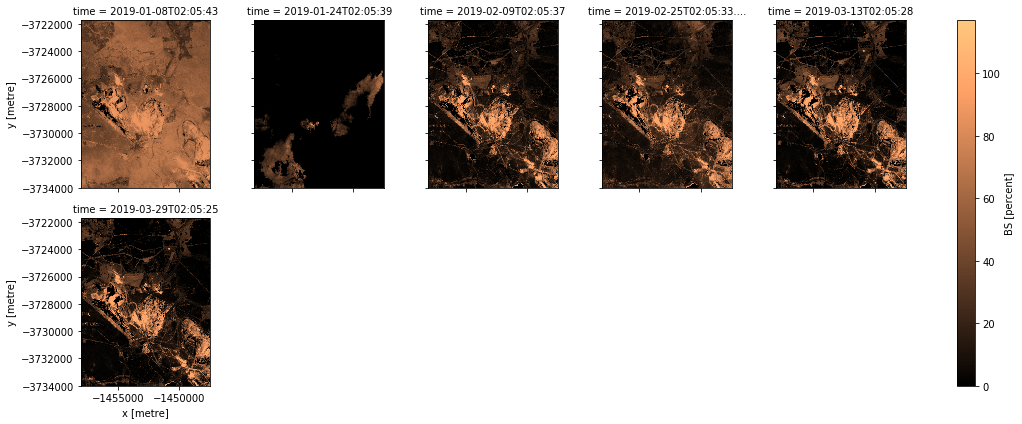

In [167]:
collie_19.BS.plot(col='time', col_wrap=5, cmap='copper')

In [168]:
collie_19 = collie_19.isel(time=slice(4,5))

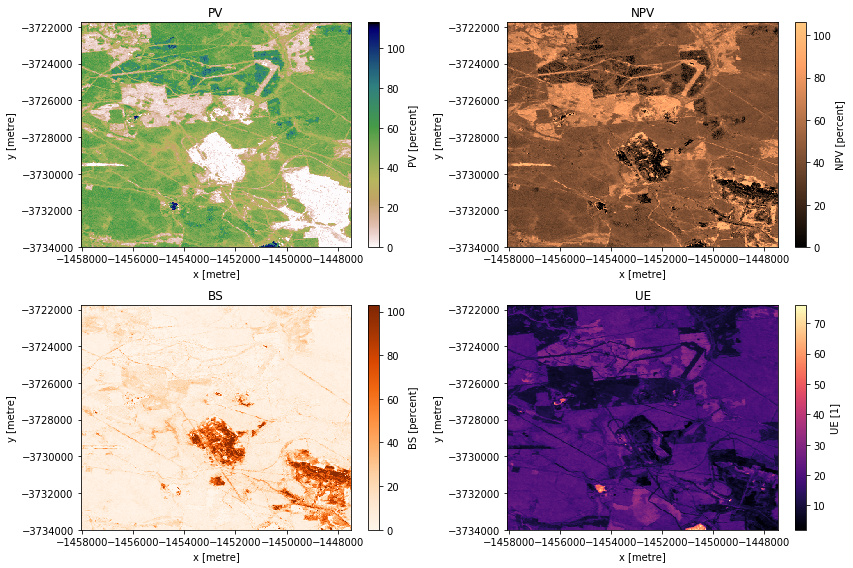

In [169]:
def plot_fc_fractions(ds):
    #set up our images on a grid using gridspec
    plt.figure(figsize=(12,8))
    gs = gridspec.GridSpec(2,2) # set up a 2 x 2 grid of 4 images for better presentation

    ax1=plt.subplot(gs[0,0])
    ds.PV.plot(cmap='gist_earth_r')
    ax1.set_title('PV')

    ax2=plt.subplot(gs[1,0])
    ds.BS.plot(cmap='Oranges')
    ax2.set_title('BS')

    ax3=plt.subplot(gs[0,1])
    ds.NPV.plot(cmap='copper')
    ax3.set_title('NPV')

    ax4=plt.subplot(gs[1,1])
    ds.UE.plot(cmap='magma')
    ax4.set_title('UE')

    plt.tight_layout()
    plt.show()
    
plot_fc_fractions(collie_04)

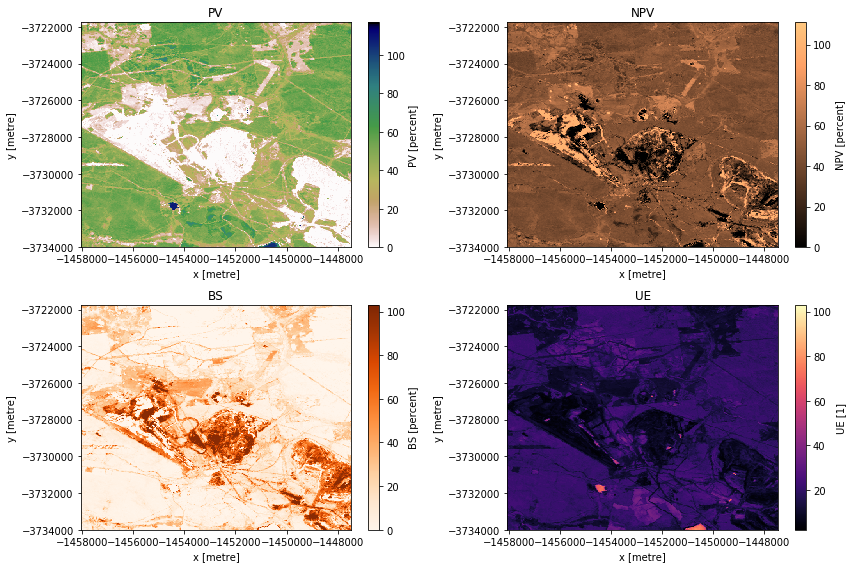

In [170]:
plot_fc_fractions(collie_19)

### First visual assessment

Comparing the fractions of the two dates you can see that the area has suffered a quite drastic change over the last 15 years. The mine seem to have extended over the west region where the BS fraction has significantly increased and the PV has suffered a notable reduction. 

Happy with these results you decide to work on your data a little bit more to try to get some numerical evidence of the changes.

You have seen that the UE component, which corresponds to Unmixing Error presents some high values in some areas of your image. The residual error is defined as the Euclidean Norm of the Residual Vector that calculates the fractions. High values express less confidence in the fractional components and you decide to get rid these pixels that might introduce errors in your calculations.

### Filtering suspicious pixels

You are interested in getting some numbers of the PV fraction but you realise the water bodies in the area introduce some false photosynthetic signal and you want to filter those out. 

1. Can you find a suitable value for UE to mask the signal from the water bodies in this area? _Replace the `?` symbol with the right value.
2. Can you compute the average PV fraction on 2004 and compare that with the one in 2019?

Text(0.5, 1, 'UE filtered')

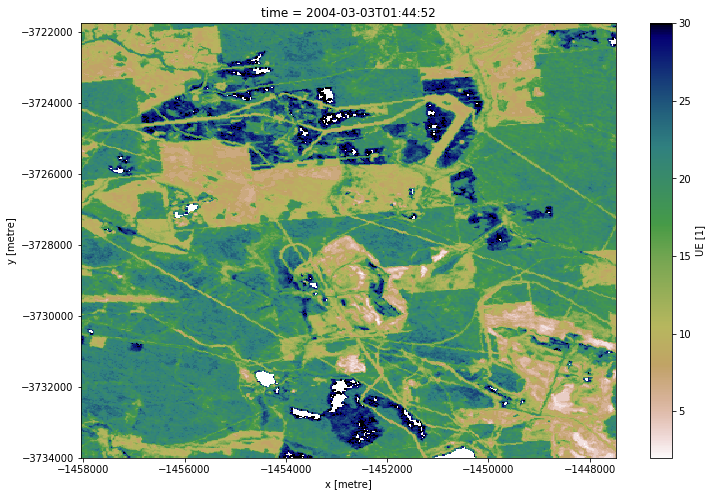

In [172]:
plt.figure(figsize=(12,8))
collie_04.UE.where(collie_04.UE<=30).plot(cmap='gist_earth_r')
ax1.set_title('UE filtered')

### Your code goes here

### Filtering fractional cover scenes using WOfS feature layers (WOFLs) 

There is not much going on today in the office and you decide to experiment a little bit more with these data. You've heard of other people using the WOfS quality layers to filter other products and decide to give it a go here to create  masks for removing areas of water.

- For more information on WOfS, see the [Introduction_to_WOfS](https://github.com/GeoscienceAustralia/dea-notebooks/blob/master/02_DEA_datasets/Introduction_to_WOfS.ipynb) notebook.

You can load the wofs feature layers (wofls) within the same query as Fractional Cover, using the functionality `like`

In [173]:
wofls_04 = dc.load(product = 'wofs_albers', like=collie_04)

### Displaying the values in wofs
WOfS uses [bit flags](http://datacube-core.readthedocs.io/en/latest/dev/api/masking.html) to flag pixels as 'wet' or otherwise

In [174]:
masking.describe_variable_flags(wofls_04, with_pandas=True)

,bits,values,description
cloud,6,"{'0': False, '1': True}",Cloudy
cloud_shadow,5,"{'0': False, '1': True}",Cloud shadow
dry,"[7, 6, 5, 4, 3, 1, 0]",{'0': True},No water detected
high_slope,4,"{'0': False, '1': True}",High slope
nodata,0,"{'0': False, '1': True}",No data
noncontiguous,1,"{'0': False, '1': True}",At least one EO band is missing over over/unde...
sea,2,"{'0': False, '1': True}",Sea
terrain_or_low_angle,3,"{'0': False, '1': True}",terrain shadow or low solar angle
wet,"[7, 6, 5, 4, 3, 1, 0]",{'128': True},Clear and Wet


### Plotting the water mask

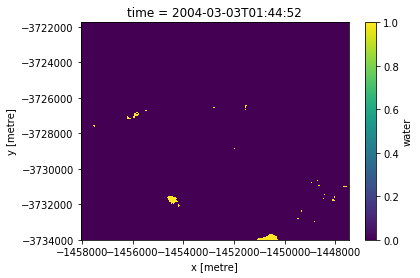

In [175]:
wetwofl = masking.make_mask(wofls_04, wet=True)
wetwofl.water.isel(time=0).plot()



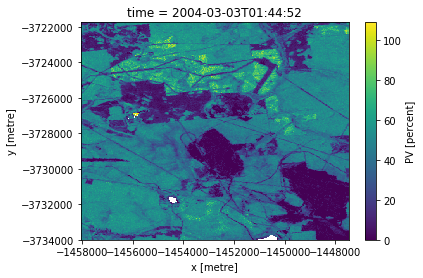

In [178]:
unwofld_04 = collie_04.where(wetwofl.water==False)
unwofld_04.PV.isel(time=0).plot()

Can you follow a similar method to filter the water out of the 2019 image?

In [ ]:
### Your code goes here


### Plotting the components as an RGB

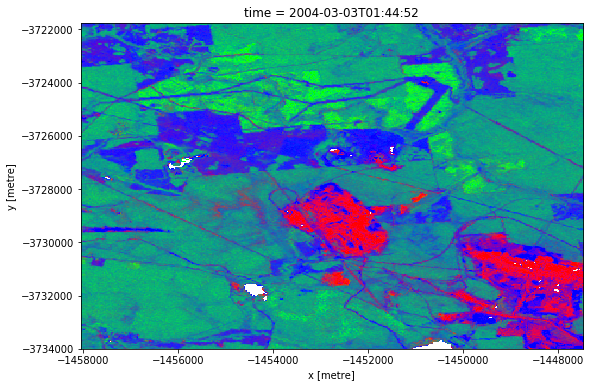

In [182]:
DEAPlotting.rgb(unwofld_04, bands=['BS','PV','NPV'], index=0, index_dim='time')
DEAPlotting.rgb(unwofld_19, bands=['BS','PV','NPV'], index=0, index_dim='time')

### Concatenating data from different sensors

You want to analyse the changes in the Photosynthetic Vegetation fraction and decide that it would be convenient to merge this variable from both Datasets into a single one. Looking at XArray documentation website you learn about the `xr.concat()` function and decide to apply it here.

In [187]:
pv = xr.concat((collie_04.PV,collie_19.PV), dim='time')

pv

<xarray.DataArray 'PV' (time: 2, y: 490, x: 423)>
array([[[18,  9, ..., 52, 48],
        [10,  9, ..., 52, 52],
        ...,
        [49, 42, ...,  0,  0],
        [55, 47, ...,  0,  0]],

       [[ 2,  9, ..., 51, 51],
        [ 2,  6, ..., 50, 47],
        ...,
        [53, 47, ...,  0,  0],
        [50, 46, ...,  0,  0]]], dtype=int16)
Coordinates:
  * y        (y) float64 -3.722e+06 -3.722e+06 ... -3.734e+06 -3.734e+06
  * x        (x) float64 -1.458e+06 -1.458e+06 ... -1.448e+06 -1.447e+06
  * time     (time) datetime64[ns] 2004-03-03T01:44:52 2019-03-13T02:05:28
Attributes:
    units:    percent
    nodata:   -1
    crs:      EPSG:3577

### Visualising the temporal changes

Using XArray functionality to compute statistics and plot data you confirm your suspicions that the region is quite less green than it used to be. 

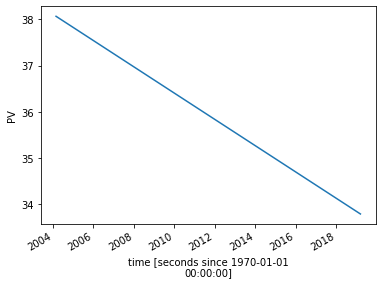

In [188]:
pv.mean(dim=['x','y']).plot()

### Exercise

Can you try to add a few more points to this graph for the years between 2004 and 2019? You want to find out how fast this mine in Collie has expanded over the last 15 years.